In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
import dotenv
dotenv.load_dotenv()
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")


from langgraph.graph import StateGraph, START, END
from typing import TypedDict

c:\Codes\Learning\Lang_graph\venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
class LLMState(TypedDict):
  topic: str
  outline: str
  blog: str

In [3]:
graph = StateGraph(LLMState)

In [4]:
def create_outline(state: LLMState) -> LLMState:
    #extract topic from state
    topic = state["topic"]

    #prmpt
    prompt = f"Create a detailed outline for a blog post about {topic}."

    #LLM call
    response = model.invoke(prompt).content

    #update state
    state["outline"] = response
    return state

In [5]:
def create_blog(state: LLMState) -> LLMState:
    #extract outline from state
    outline = state["outline"]

    #prompt
    prompt = f"Write a detailed blog post based on the topic {state['topic']} and following outline:\n{outline}"

    #LLM call
    response = model.invoke(prompt).content

    #update state
    state["blog"] = response
    return state

In [6]:
graph.add_node("Create Outline", create_outline)
graph.add_node("Create Blog", create_blog)

graph.add_edge(START, "Create Outline")
graph.add_edge("Create Outline", "Create Blog")
graph.add_edge("Create Blog", END)


workflow = graph.compile()

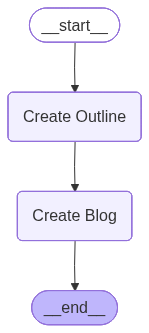

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [8]:
initial_state = {"topic": "The Future of Artificial Intelligence"}
final_state = workflow.invoke(initial_state)
print(final_state)

{'topic': 'The Future of Artificial Intelligence', 'outline': '## Blog Post Outline: The Future of Artificial Intelligence: Trends, Possibilities, and Concerns\n\n**I. Introduction**\n\n   *  **Hook:** Start with a captivating anecdote, surprising statistic, or thought-provoking question related to AI\'s impact on daily life. Examples:\n        *  "Imagine a world where your doctor is an AI, diagnosing illnesses with unparalleled accuracy."\n        *  "Did you know that AI is projected to contribute trillions to the global economy in the next decade?"\n        *  "Are we ready for a future where AI is not just a tool, but an active participant in shaping our world?"\n   *  **Briefly define Artificial Intelligence (AI):**  Keep it simple and accessible, focusing on its ability to mimic human intelligence.\n   *  **Thesis Statement:**  Clearly state the blog post\'s main argument.  Example: "The future of AI holds immense potential for progress across various sectors, but it also presen

In [11]:
print(final_state["outline"])

## Blog Post Outline: The Future of Artificial Intelligence: Trends, Possibilities, and Concerns

**I. Introduction**

   *  **Hook:** Start with a captivating anecdote, surprising statistic, or thought-provoking question related to AI's impact on daily life. Examples:
        *  "Imagine a world where your doctor is an AI, diagnosing illnesses with unparalleled accuracy."
        *  "Did you know that AI is projected to contribute trillions to the global economy in the next decade?"
        *  "Are we ready for a future where AI is not just a tool, but an active participant in shaping our world?"
   *  **Briefly define Artificial Intelligence (AI):**  Keep it simple and accessible, focusing on its ability to mimic human intelligence.
   *  **Thesis Statement:**  Clearly state the blog post's main argument.  Example: "The future of AI holds immense potential for progress across various sectors, but it also presents significant ethical, societal, and economic challenges that require car

In [12]:
print(final_state["blog"])

## The Future of Artificial Intelligence: A Double-Edged Sword?

Imagine a world where your commute vanishes, replaced by productive work or leisure time in a self-driving car. Envision doctors diagnosing diseases with pinpoint accuracy thanks to AI-powered image analysis. This future, powered by Artificial Intelligence (AI), is closer than you think. But are we ready for it?

Artificial Intelligence, simply put, is the ability of machines to mimic human intelligence – to learn, reason, and solve problems. It's no longer science fiction; it's rapidly transforming our world.

The future of AI holds immense potential for progress across various sectors, but it also presents significant ethical, societal, and economic challenges that require careful consideration and proactive solutions. This blog post will explore the current state of AI, emerging trends, potential benefits, and the crucial ethical considerations that will shape its trajectory.

**I. Current State of AI: Where Are We Now